In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Data Exploration

In [2]:
df=pd.read_csv("train.csv")
print ("Total Samples : ",len(df))

Total Samples :  31647


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
ID            31647 non-null int64
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [5]:
df.keys()

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
#count the number of rows for each type
df.groupby('subscribed').size()

subscribed
no     27932
yes     3715
dtype: int64

In [7]:
'''
Creating a column called OUTPUT_LABEL which is going to represent 0 for the negative class and 1 for the positive class
based on the bank marketing data set.
'''
df['OUTPUT_LABEL'] = (df.subscribed == 'yes').astype('int')

In [8]:
# The prevalence of the positive class is calculated here
# y_actual is the var for the ones who actually subscribed

def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))


print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.117


## Exploring unique values

In [9]:
df[list(df.columns)[:10]].head()

,ID,age,job,marital,education,default,balance,housing,loan,contact
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone
1,40576,31,unknown,married,secondary,no,3,no,no,cellular
2,15320,27,services,married,secondary,no,891,yes,no,cellular
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular
4,29842,31,technician,married,secondary,no,119,yes,no,cellular


In [10]:
df[list(df.columns)[10:]].head()

,day,month,duration,campaign,pdays,previous,poutcome,subscribed,OUTPUT_LABEL
0,19,nov,44,2,-1,0,unknown,no,0
1,20,jul,91,2,-1,0,unknown,no,0
2,18,jul,240,1,-1,0,unknown,no,0
3,22,jun,867,1,84,3,success,yes,1
4,4,feb,380,1,-1,0,unknown,no,0


In [11]:
print('Number of columns:',len(df.columns))

Number of columns: 19


In [12]:
# for every column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

ID: 31647 unique values
age: 76 unique values
job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
balance: 6326 unique values
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
day: 31 unique values
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
duration: 1454 unique values
campaign: 45 unique values
pdays: 509 unique values
previous: 38 unique values
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']
OUTPUT_LABEL
[0 1]


## Feature Engineering

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data for results in machine learning algorithms.In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.


### Numerical Features

In [13]:
cols_num = ['ID','age','balance','day','duration','campaign','pdays','previous',]

df[cols_num].head()

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0


### Graphical Representation

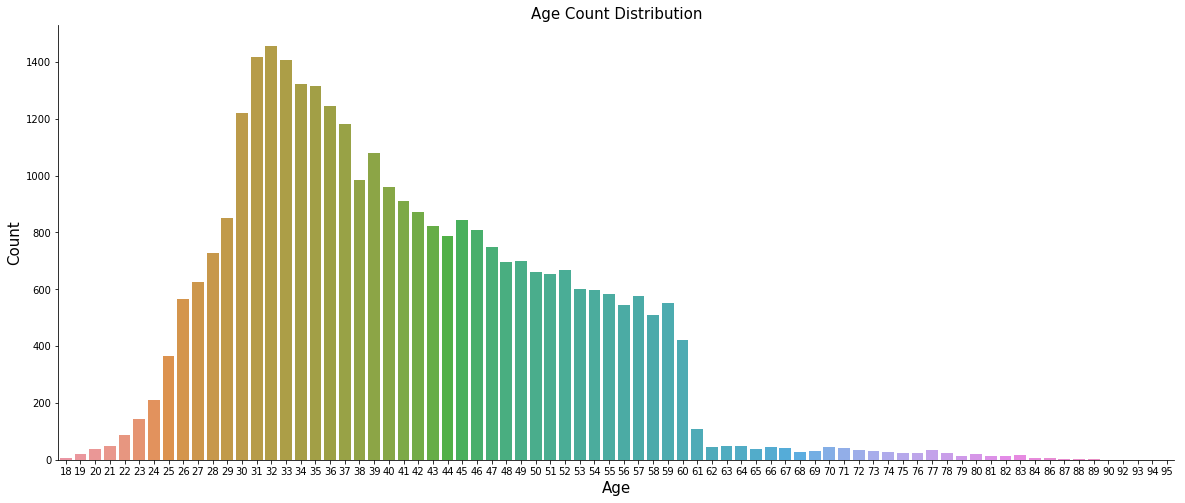

In [14]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

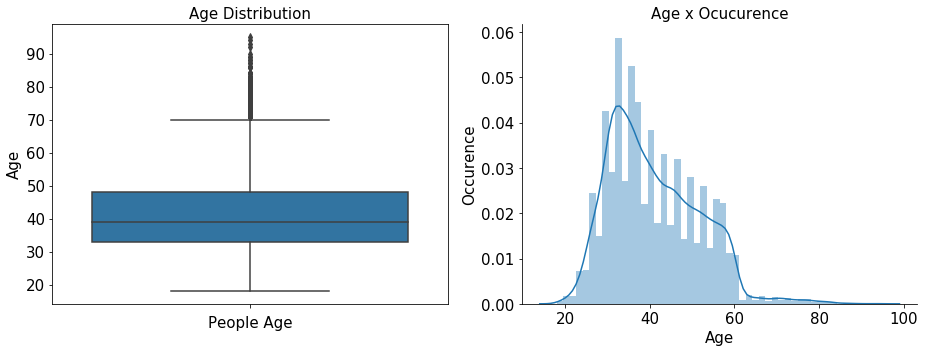

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

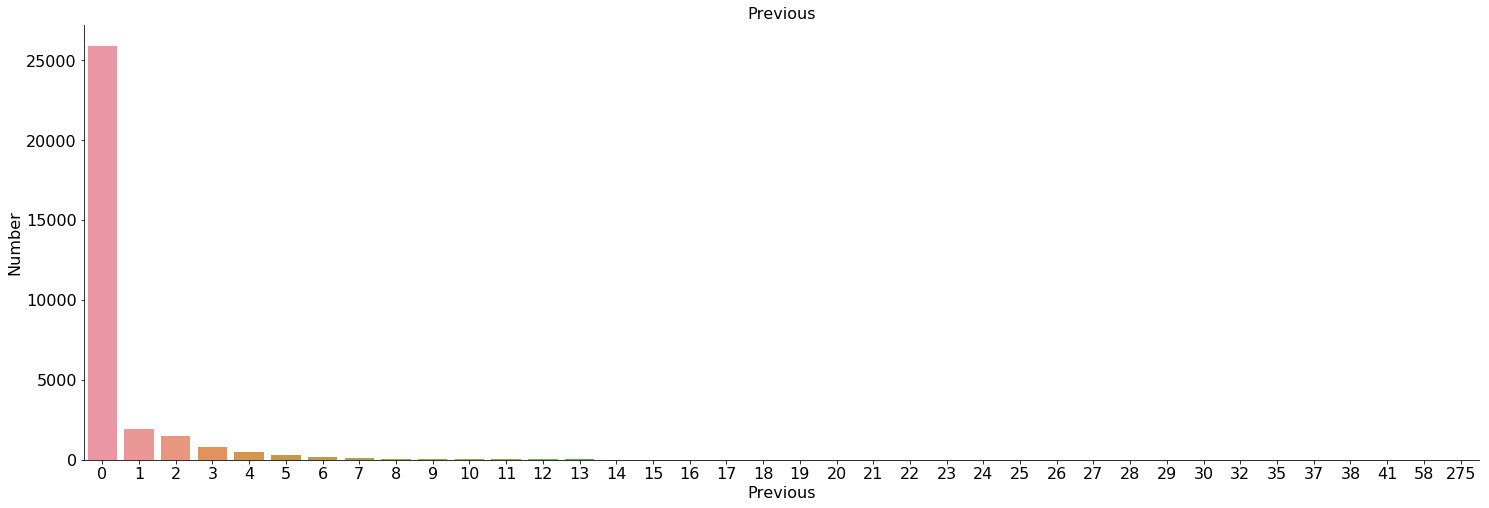

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

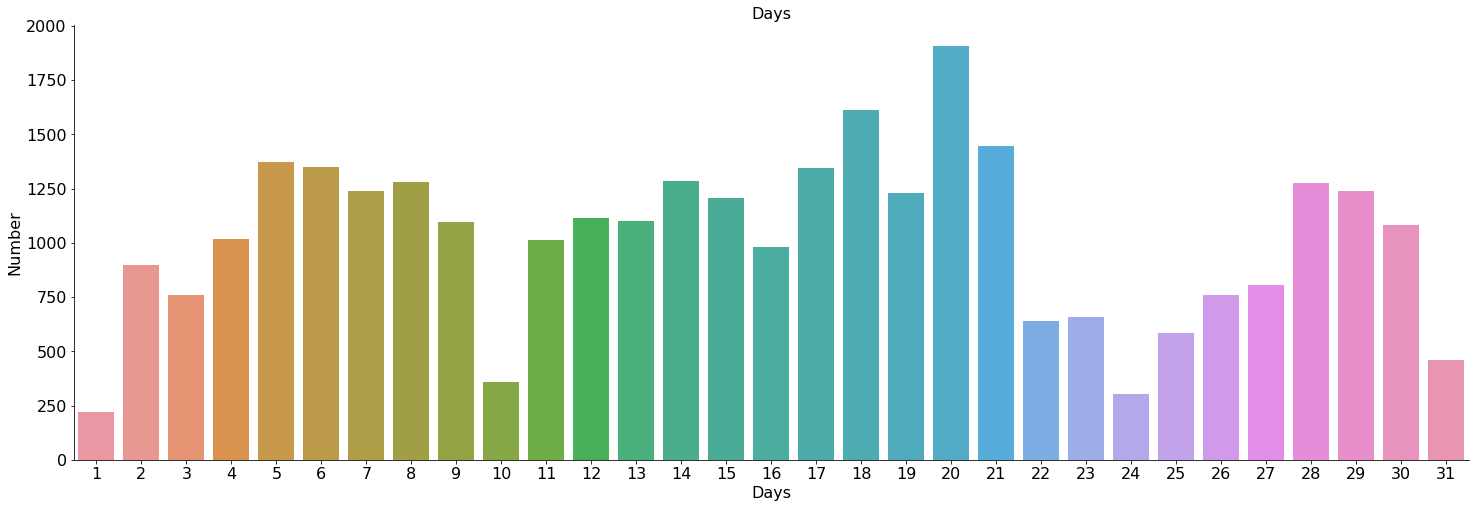

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'day', data = df[cols_num])
ax.set_xlabel('Days', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Days', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

## Categorical Features

Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

In [18]:
cols_cat = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'poutcome']

# checking for missing data
df[cols_cat].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

## One-Hot Encoding

To **convert our categorical features to numbers**, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise.

In [19]:
cols_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome']
df[cols_cat]
cols_new_cat = pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Graphical Representation of Categorical Features

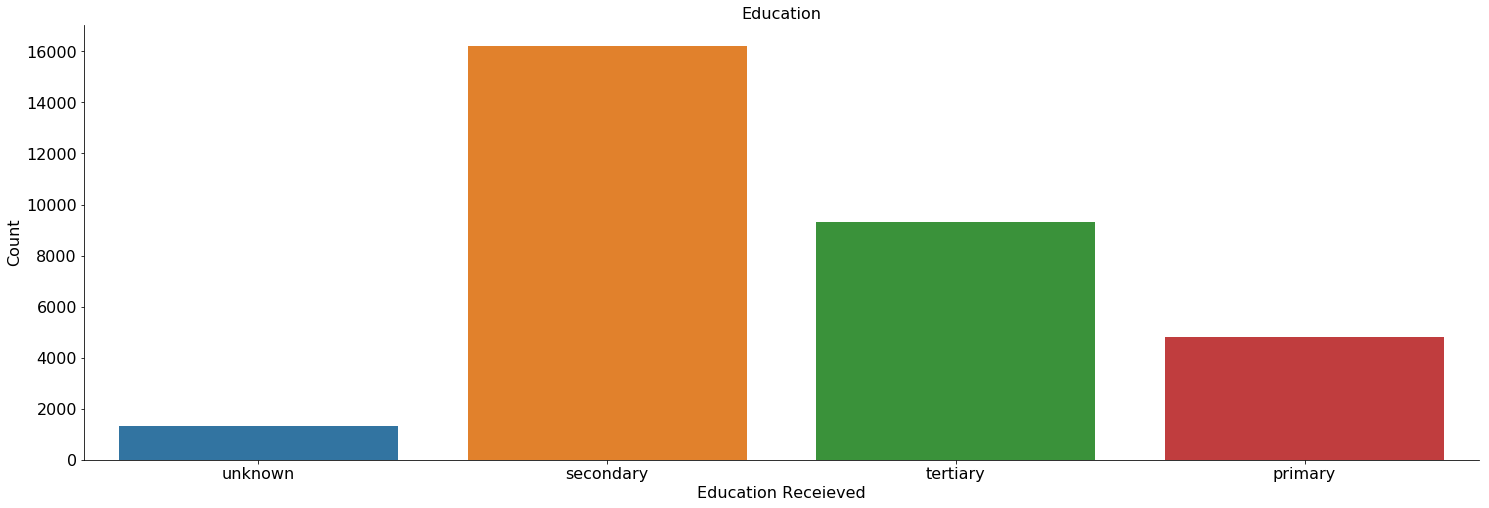

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

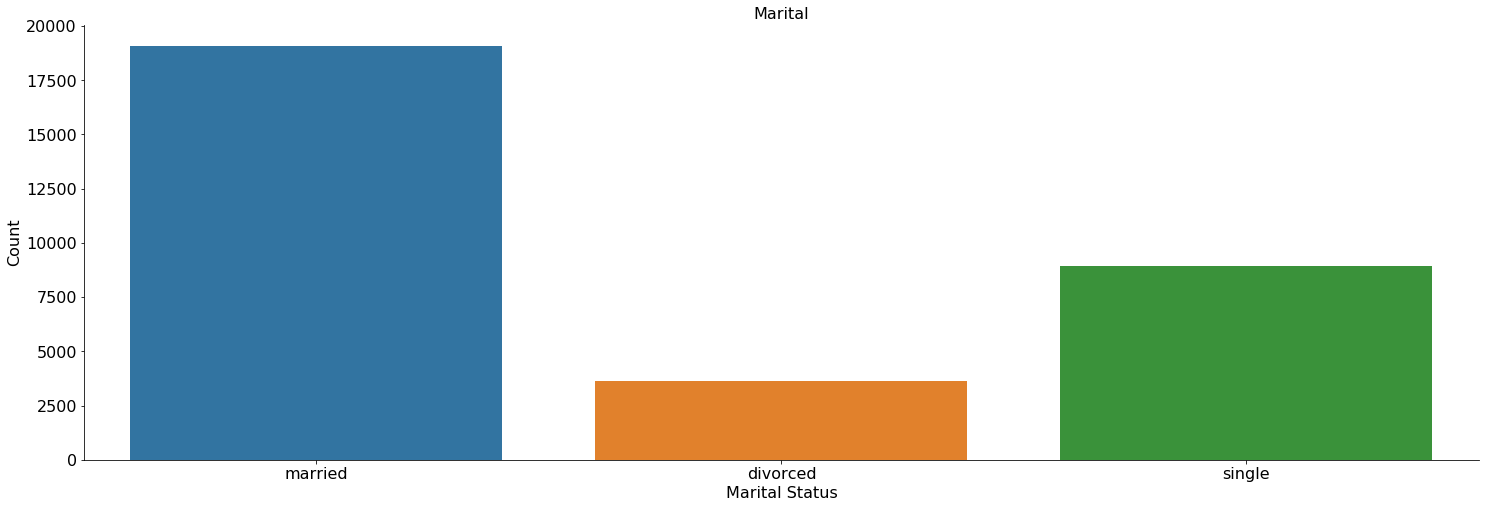

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

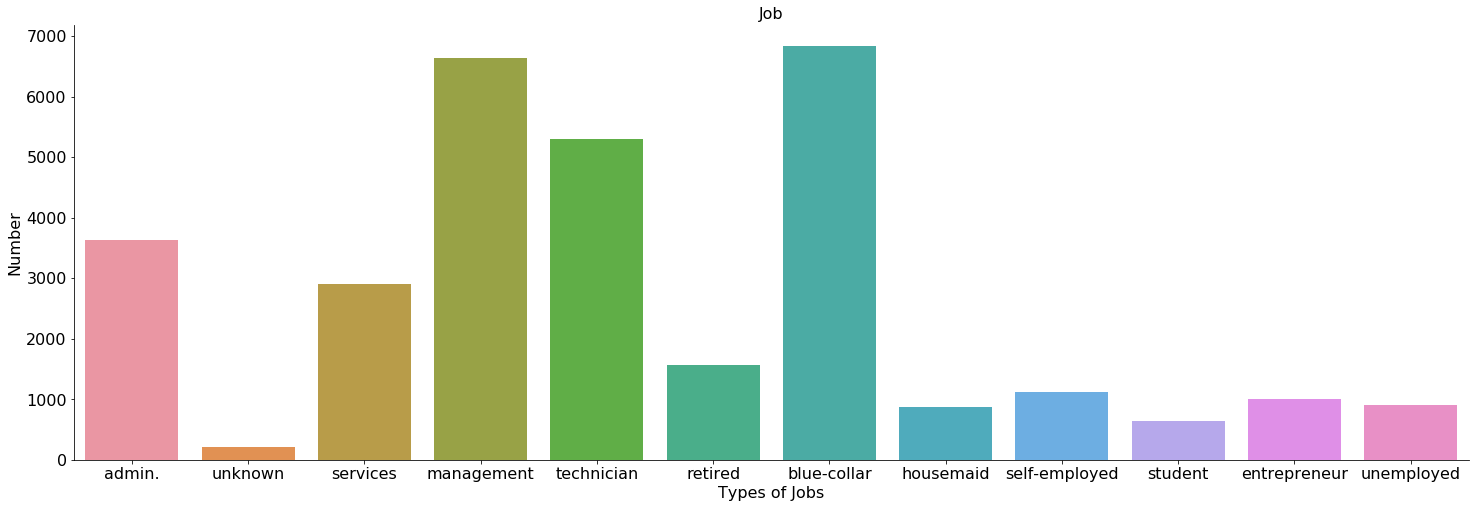

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

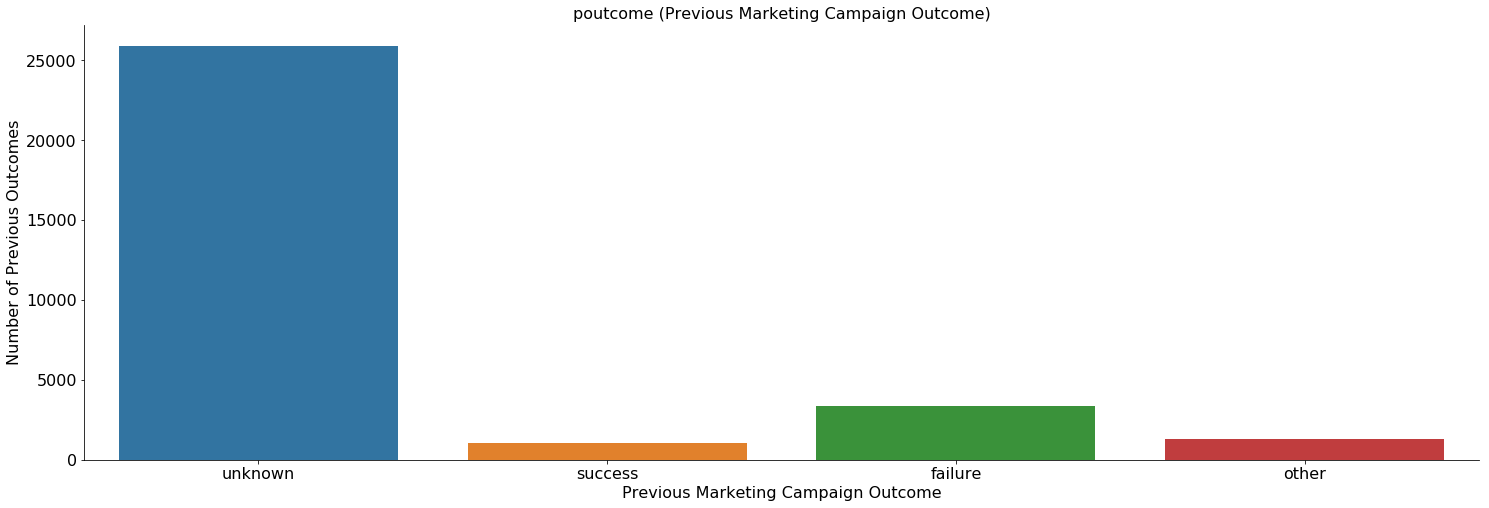

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

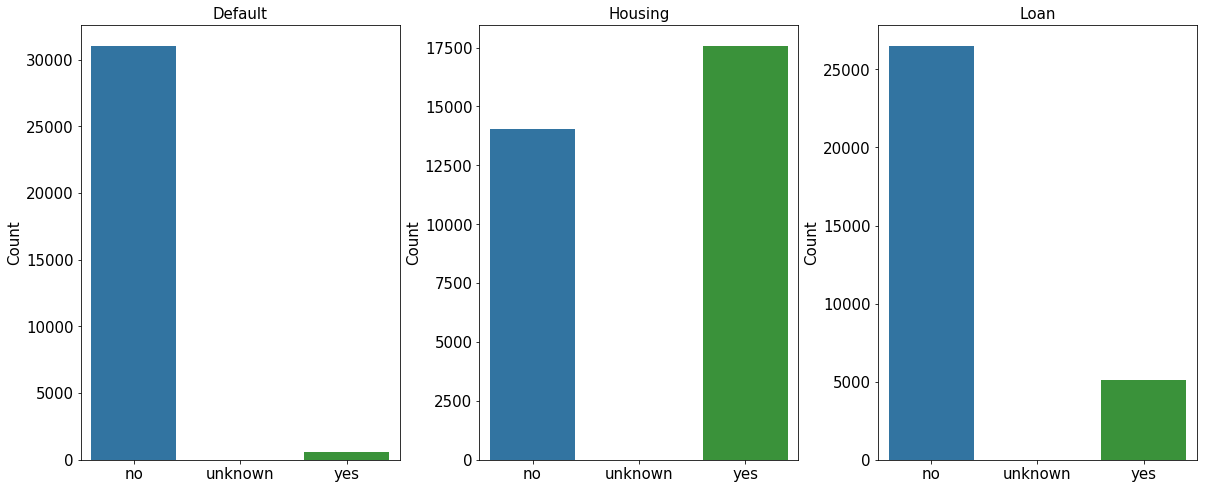

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

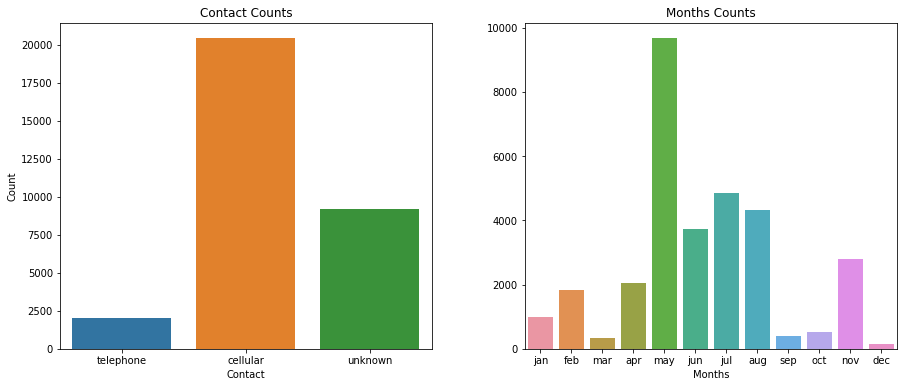

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(15, 6)

sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['jan','feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [26]:
# In order to add the one-hot encoding columns to the dataframe, we use the concat function. axis = 1 is used to add the columns.

df = pd.concat([df,cols_new_cat], axis = 1)
cols_all_cat=list(cols_new_cat.columns)
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Summary of features engineering

In [27]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 52
Numerical Features: 8
Categorical Features: 44


In [28]:
# Data check for missing values
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

poutcome_unknown       0
poutcome_success       0
education_primary      0
marital_single         0
marital_married        0
marital_divorced       0
job_unknown            0
job_unemployed         0
job_technician         0
job_student            0
job_services           0
job_self-employed      0
job_retired            0
job_management         0
job_housemaid          0
job_entrepreneur       0
job_blue-collar        0
job_admin.             0
previous               0
pdays                  0
campaign               0
duration               0
day                    0
balance                0
age                    0
education_secondary    0
education_tertiary     0
education_unknown      0
month_feb              0
poutcome_other         0
poutcome_failure       0
month_sep              0
month_oct              0
month_nov              0
month_may              0
month_mar              0
month_jun              0
month_jul              0
month_jan              0
month_dec              0


In [29]:
# new dataframe, which includes the columns of interest.

cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

cols_input

['ID',
 'age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [30]:
len(cols_input)

52

In [31]:
df_data.head(5)

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,OUTPUT_LABEL
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,43962,57,3287,22,867,1,84,3,0,0,...,0,0,0,0,0,0,0,1,0,1
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Building Training, Validation & Test Samples

Training samples: these are samples from the data set used to train the model. It can be 70% of the data.

Validation samples: these are samples used to validate or make decisions from the model. It can be 15% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 15% of the data.

Let's shuffle the samples using sample in case there was some order (e.g. all positive samples on top). Here n is the number of samples. random_state is just specified so the project is reproducable.

The training (df_train_all), validation (df_valid) and test (df_test) set were created below.

In [32]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [33]:
# 30% of the validation and test samples
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [34]:
# split into test & validation samples by 50%, which makes 15% of test & 15% of validation samples.

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [35]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [36]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 4747):0.122
Valid prevalence(n = 4747):0.122
Train all prevalence(n = 22153):0.116


We need to **balance the data set** because if we use the training data as the predictive model the accuracy is going to be very high because we haven't caught any of the subscribed output which states whether a person will buy a term deposit or not. There are more negatives than positive so the predictive models assigns negatives to much of the samples. **Creating a balance sheet will allow 50% of the samples to be both positive and negative.**

In [37]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 5118):0.500


In [38]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid balanced prevalence(n = 1154):0.500


In [39]:
# split the test into positive and negative
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Test balanced prevalence(n = 1158):0.500


In [40]:
# all 4 data frames were saved into csv and the cols_input

df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [41]:
'''
Saving cols_input too with a package called pickle
The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
'''
import pickle
pickle.dump(cols_input, open('cols_input.sav','wb'))

In [42]:
# any missing values were filled with the mean value

def fill_my_missing(df, df_mean, col2use):

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [43]:
# the mean value from the training data
df_mean = df_train_all[cols_input].mean(axis = 0)

# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [44]:
# loaded the means
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,ID,22609.769196
1,age,40.947366
2,balance,1354.041890
3,day,15.829323
4,duration,258.147023


In [45]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [46]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (22153, 52)
Training shapes: (5118, 52) (5118,)
Validation shapes: (1154, 52) (1154,)


In [47]:
# Created a scalar, saved it, and scaled the X matrices

from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [49]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [50]:
# transform data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

## Model Selection

This section allows us to test various machine learning algorithm to see how our independent variables accurately predit our dependent subscribed output variable. We will then select the best model based on performance on the validation set. We will utilize the following functions to evaluate the performance of the model.

In [51]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [52]:
# Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive.
thresh = 0.5

### Baseline models

- K-nearest neighbours (KNN)
- Logistic Regression
- Stochastic Gradient Descent
- Naive Bayes
- Decision Tree
- Random Forest
- Gradient Boosting Classifier

### K nearest neighbours (KNN)

K Nearest Neighbors looks at the k closest datapoints and probability sample that has positive labels. It is easy to implement, and you don't need an assumption for the data structure. KNN is also good for multivariate analysis.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [54]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity, knn_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity, knn_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.882
accuracy:0.768
recall:0.660
precision:0.843
specificity:0.869
prevalence:0.500
f1:0.740
 
Validation:
AUC:0.886
accuracy:0.778
recall:0.657
precision:0.867
specificity:0.889
prevalence:0.500
f1:0.748
 


For the training set, I got an **AUC of 88.2% which catches 66.0% (recall) of potential customers using a threshold of 0.5 which is good.**



### Loigistic Regression

Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples.

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity, lr_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity, lr_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.928
accuracy:0.853
recall:0.859
precision:0.850
specificity:0.848
prevalence:0.500
f1:0.854
 
Validation:
AUC:0.931
accuracy:0.861
recall:0.854
precision:0.866
specificity:0.868
prevalence:0.500
f1:0.860
 


For the training set, I got an **AUC of 92.8% which catches 85.9% (recall) of potential customers using a threshold of 0.5** which is better than previous.


### Stochastic Gradient Descent

Stochastic Gradient Descent analyzes various **sections of the data** instead of the data as a whole and **predicts the output using the independent variables**. Stochastic Gradient Descent is faster than logistic regression in the sense that it doesn't run the whole dataset but instead looks at different parts of the dataset.

In [57]:
from sklearn.linear_model import SGDClassifier

sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [58]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity, sgdc_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity, sgdc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.920
accuracy:0.846
recall:0.833
precision:0.855
specificity:0.859
prevalence:0.500
f1:0.844
 
Validation:
AUC:0.922
accuracy:0.848
recall:0.827
precision:0.864
specificity:0.870
prevalence:0.500
f1:0.845
 


For the training set, I got an **AUC of 92.0% which catches 83.3% (recall) of potential customers using a threshold of 0.5**.



### Naive Bayes

Naive Bayes assumes that **all variables in the dataset are independent** of each other. Meaning that there are no dependent variables or output. This algorithm uses Bayes rule which calculated the probability of an event related to previous knowledge of the variables concerning the event. This won't really work in this case since we have an output of the bank customers who will get a bank deposit. This process is better for tasks such as image processing.

In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None)

In [60]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity, nb_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity, nb_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.810
accuracy:0.724
recall:0.598
precision:0.799
specificity:0.850
prevalence:0.500
f1:0.684
 
Validation:
AUC:0.812
accuracy:0.730
recall:0.607
precision:0.805
specificity:0.853
prevalence:0.500
f1:0.692
 


For the training set, I got an **AUC of 81.0% which catches 59.8% (recall) of potential customers using a threshold of 0.5**.



### Decision Tree Classifier

Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

In [61]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [62]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.981
accuracy:0.939
recall:0.973
precision:0.911
specificity:0.903
prevalence:0.500
f1:0.941
 
Validation:
AUC:0.866
accuracy:0.857
recall:0.886
precision:0.838
specificity:0.828
prevalence:0.500
f1:0.861
 


For the training set, I got an **AUC of 98.1% which catches 97.3% (recall) of potential customers using a threshold of 0.5**.



### Random Forest

Random forest works like a decision tree algorithm but it performs various decision tree analysis on the dataset as a whole. That is, it is the bigger version of the decision tree; a forest is bigger than a tree, you can think of it that way. Random forest takes random samples of trees and it works faster than the decision tree algorithm.

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity, rf_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.937
accuracy:0.876
recall:0.907
precision:0.854
specificity:0.845
prevalence:0.500
f1:0.880
 
Validation:
AUC:0.926
accuracy:0.863
recall:0.882
precision:0.850
specificity:0.844
prevalence:0.500
f1:0.866
 


For the training set, I got an **AUC of 93.7% which catches 90.7% (recall) of potential customers using a threshold of 0.5**.



### Gradient Boosting Classifier

**Boosting is a technique that builds a new decision tree algorithm that focuses on the errors on the dataset to fix them**. This learns the whole model in other to fix it and improve the prediction of the model. Aside from being related to decision trees, it also relates to gradient descent algorithm as the name signifies. Gradient boosting analyzes different parts of the dataset and builds trees that focuses and corrects those errors. The XGBoost library is also the determining factor in winning a lot of Kaggle data science competitions.

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [66]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)


Gradient Boosting Classifier
Training:
AUC:0.994
accuracy:0.970
recall:0.981
precision:0.961
specificity:0.960
prevalence:0.500
f1:0.971
 
Validation:
AUC:0.925
accuracy:0.861
recall:0.868
precision:0.856
specificity:0.854
prevalence:0.500
f1:0.862
 


For the training set, I got an **AUC of 99.4% which catches 98.1% (recall) of potential customers using a threshold of 0.5**.



## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn - making a dataframe with the results of all the baseline models and plot the outcomes. In this project, **we will utilize the Area under the ROC curve (AUC) to evaluate the best model**. This is a good data science performance metric for picking the best model since **it captures the trade off between the true positive and false positive and does not require selecting a threshold**.

In [67]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,],
                          'f1':[knn_train_f1, knn_valid_f1,lr_train_f1,lr_valid_f1,sgdc_train_f1,sgdc_valid_f1,nb_train_f1,nb_valid_f1,tree_train_f1,tree_valid_f1,rf_train_f1,rf_valid_f1,gbc_train_f1,gbc_valid_f1,],
                          })

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

All the algorithms have similar training AUC's, but the ones that stood out are decision tree (DT) and gradient boosting (GB). I would choose gradient boosting as the best metric to use because it has a higher auc (0.9) than the other algorithms. At a threshold of 0.5, an auc of 0.9 is good as it signifies that it is more than just a random guess towards a positive class and it is close to 1 which is great!

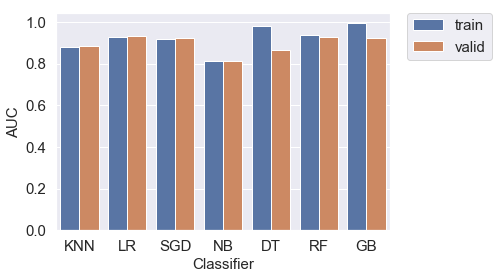

In [69]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

## Learning Curves

We can diagnose how our models are doing by plotting a learning curve. In this section, we will make use of the learning curve code from scikit-learn’s website with a small change of plotting the AUC instead of accuracy. Gradient Descent has the best AUC score (0.8) for the validation model and the learning curve for the model will be displayed below.

### Steps :-

Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

In [70]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

The Stochastic Gradient Descent model with max_depth = 20, resulting in high variance

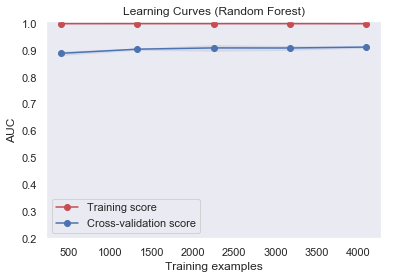

In [71]:
from sklearn.ensemble import RandomForestClassifier

title = "Learning Curves (Random Forest)"

# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

### Variance and Bias

In the case of random forest, we can see the model has high variance because the training and cross-validation scores show data points which are very spread out from one another. **High variance would cause an algorithm to model the noise in the training set (overfitting)**.

Depending on the learning curve, there are a few strategies we can employ to improve the models

High Variance:

- Add more samples
- Add regularization
- Reduce number of features
- Decrease model complexity
- Add better features
- Change model architecture

High Bias:

- Add new features
- Increase model complexity
- Reduce regularization
- Change model architecture


## Feature Importance

This section focuses on the importance of the different features generated and in the dataframe. Depending on the importance score of some features, we can focus on higher importance scores to see if the AUC score (performance) of the model will improve.


### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
feature_importances = pd.DataFrame(lr.coef_[0],index = cols_input, columns=['importance']).sort_values('importance', ascending=False)

In [74]:
feature_importances

,importance
duration,1.662512
ID,1.645164
contact_unknown,0.370838
poutcome_success,0.286475
month_mar,0.224303
month_oct,0.144741
housing_no,0.139846
month_jul,0.138521
month_feb,0.135268
month_apr,0.117583


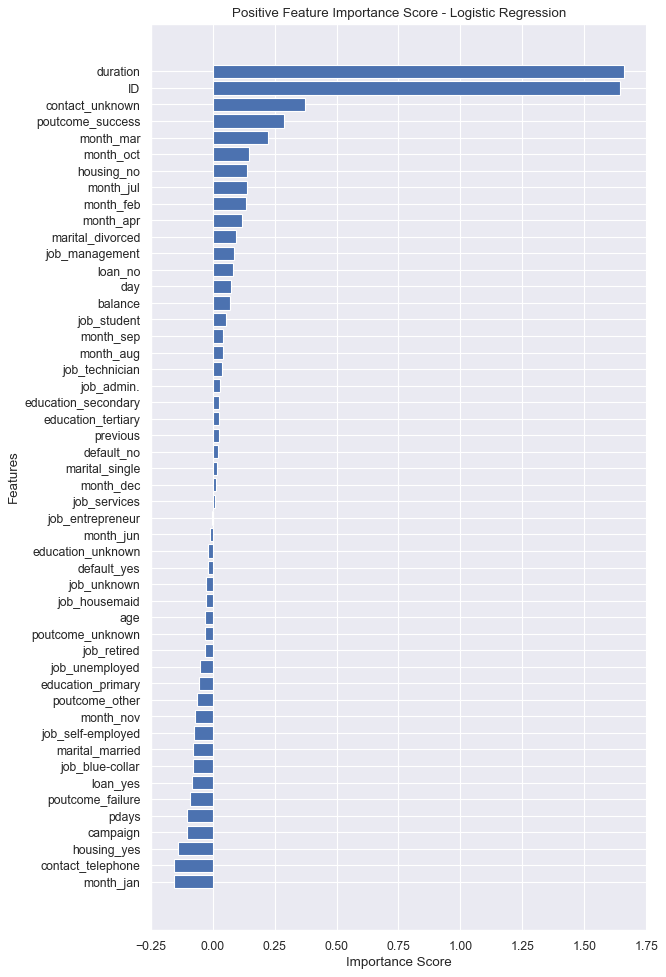

In [75]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

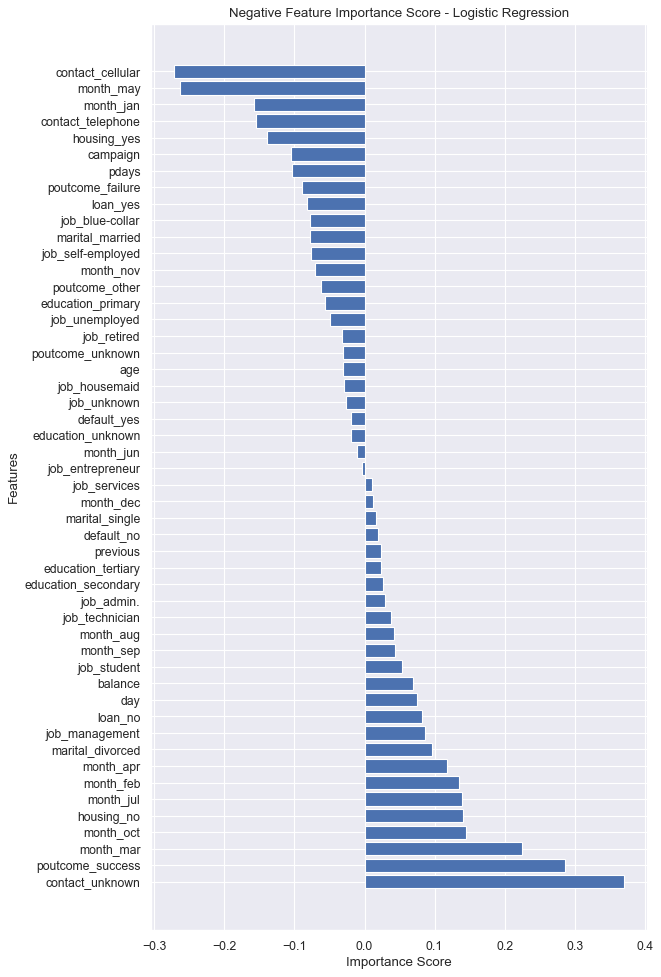

In [76]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In the case of high variance, one strategy is to reduce the number of variables to minimize overfitting. After this analyis, you could use the top N positive and negative features or the top N important random forest features. You might need to adjust N so that your performance does not drop drastically.


### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [78]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = cols_input, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head()

,importance
duration,0.352697
ID,0.294818
housing_yes,0.051027
poutcome_unknown,0.049408
pdays,0.027665


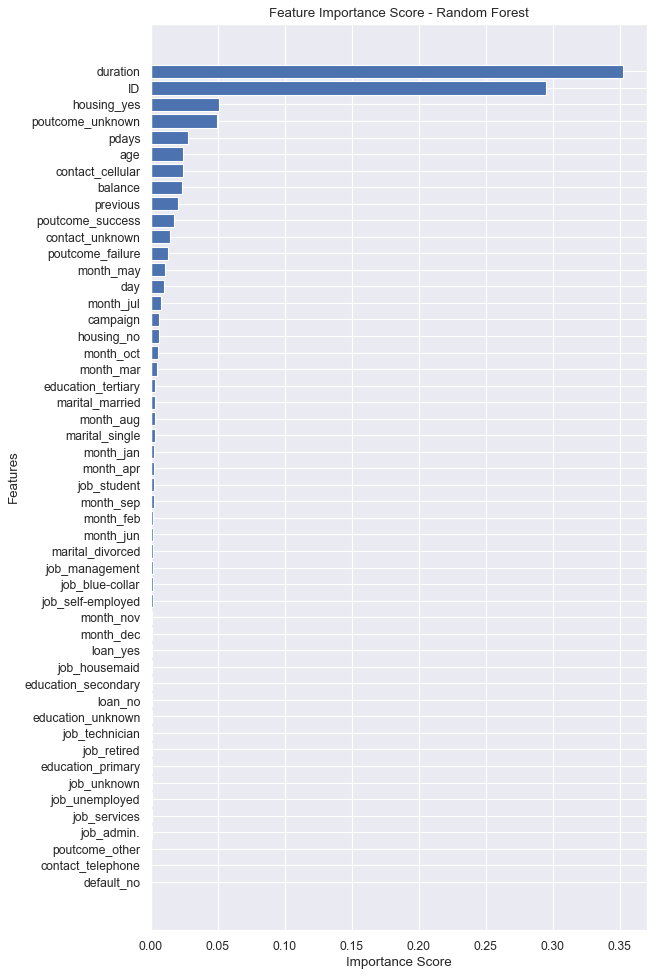

In [79]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [81]:
feature_importances = pd.DataFrame(gbc.feature_importances_, index = cols_input, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head()

,importance
ID,0.231064
duration,0.173685
balance,0.122956
job_self-employed,0.065804
age,0.064749


I realized the features that have more positive impact on the predictive outcomes of the model: duration and balance are very crucial as their importance score is higher than other numerical variables.

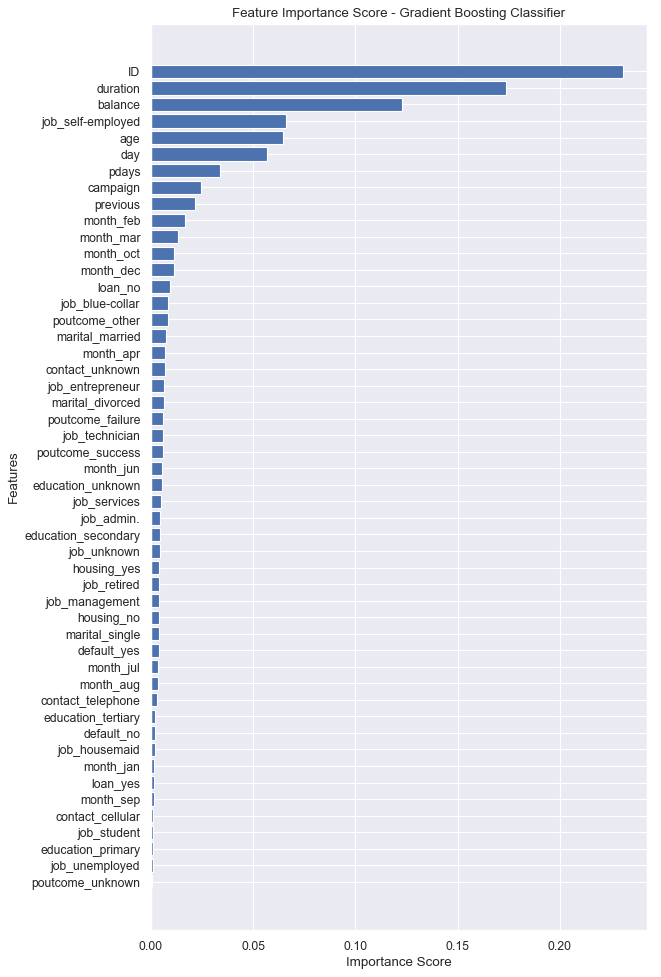

In [82]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

### Decision Trees

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [84]:
feature_importances = pd.DataFrame(tree.feature_importances_, index = cols_input, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head()

,importance
duration,0.441589
ID,0.308387
day,0.039580
month_mar,0.026737
housing_no,0.021656


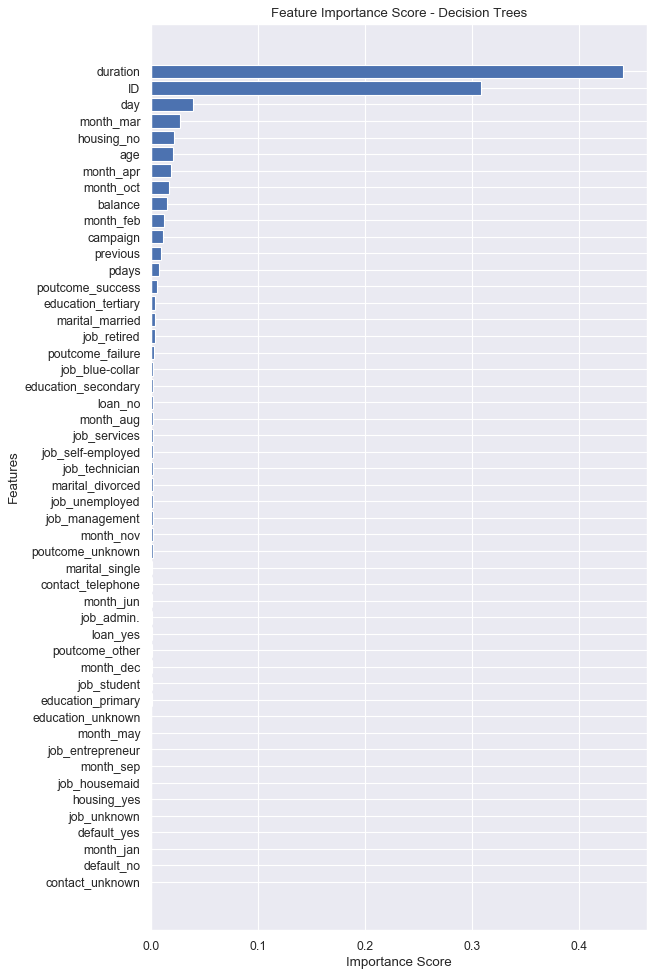

In [85]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Trees')
plt.yticks(ylocs, feature_labels)
plt.show()

## Hyperparameter Tuning

A hyperparameter is a tool used in machine learning in order to estimate the model parameters (used in tuning a predictive modeling problem). Hyperparameters are used in various machine learning algorithms.

In [86]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf =RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

n_estimators is a hyperparameter in the RandomForestClassifier that depending on the numbers of estimators entered the model can be overfitted, good compromise or underfitted. n_estimators is used for fine tuning the models in order to fit the training data. max_depth is also another hyperparameter; it controls the depth of the machine learning algorithm model.

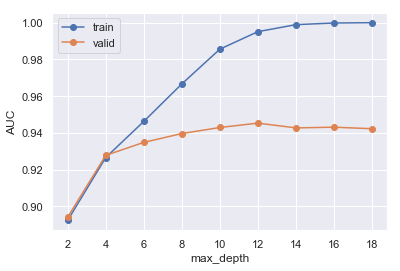

In [87]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

Using RandomizedSearchCV to optimize a few of the baseline models. GradientBoosting Classifier may take a while so one might need to adjust the number of iterations or specific parameters. If this takes too long on the computer, one can take it out.

In [88]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [89]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)

# maximum number of features to use at each split
max_features = ['auto','sqrt']

# maximum depth of the tree
max_depth = range(2,20,2)

# minimum number of samples to split a node
min_samples_split = range(2,10,2)

# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [90]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [91]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [92]:
import time

# fit the random search model
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.2min finished


195.58209133148193


In [93]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'max_features': 'auto',
 'max_depth': 16,
 'criterion': 'entropy'}

In [95]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('\nOptimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.937
Validation AUC:0.926

Optimized Random Forest
Training AUC:0.996
Validation AUC:0.945


#### Optimized SDGClassifier

In [96]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [97]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty, 'max_iter':max_iter, 'alpha':alpha}

# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

38.870091915130615


In [98]:
sgdc_random.best_params_

{'penalty': 'l1', 'max_iter': 400, 'alpha': 0.001}

In [99]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('\nOptimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.920
Validation AUC:0.922

Optimized sgdc
Training AUC:0.928
Validation AUC:0.931


#### Optimized Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [101]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

44.89000844955444


In [102]:
gbc_random.best_params_

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

In [103]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('\nOptimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.994
Validation AUC:0.925

Optimized gbc
Training AUC:0.976
Validation AUC:0.944


In [104]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [105]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.922019
1,SGD,optimized,0.931033
2,RF,baseline,0.926176
3,RF,optimized,0.945394
4,GB,baseline,0.924933
5,GB,optimized,0.944403


Comparing the performance of the optimized models to the baseline models

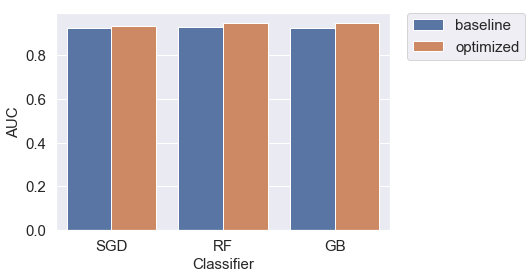

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

# Picking the best model

I picked Gradient Boosting optimized version as my best model because the optimized version has a higher auc metric than the baseline models of Stochastic Gradient Descent and Random Forest. Gradient Boosting's AUC score also tells me that most of my data are predicted positives which has a good chance of occuring and can be used to make strategic decisions for management.

In [107]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

Below is the evaluation of the performance of the best model on the training, validation and test sets. I also created an ROC curve.

In [108]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [109]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [110]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [111]:
# Prediction Possibilities

y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [112]:
# Evaluating Performances

thresh = .5

print('\nTraining:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('\nValidation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('\nTest:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)


Training:
AUC:0.976
accuracy:0.915
recall:0.953
precision:0.886
specificity:0.877
prevalence:0.500
f1:0.918
 

Validation:
AUC:0.944
accuracy:0.889
recall:0.912
precision:0.872
specificity:0.867
prevalence:0.500
f1:0.892
 

Test:
AUC:0.942
accuracy:0.885
recall:0.933
precision:0.852
specificity:0.838
prevalence:0.500
f1:0.890
 


## The ROC Curve

We can also create the ROC curve for the 3 datasets as shown belowROC curve for the 3 datasets as shown below

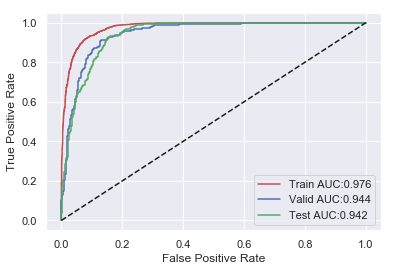

In [113]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Our data shows that the results for the training, validation and testing data sets are skewed towards the true positive rate and above the treshold of 0.5 which is great! For example, the test AUC of 0.795 means that the gradient boosting model has a performance of 79.5%.

In [114]:
df_data.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,OUTPUT_LABEL
0,28615,47,1225,29,191,3,227,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,11749,52,1545,20,115,4,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,10175,40,1780,11,114,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,35576,58,229,7,162,7,-1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,12047,39,281,20,78,7,-1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Conclusion

Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters. The model's performance is 94.2%.

A precision of 0.85 divided by a prevalence of 0.50 gives us 1.6, which means that the machine learning model helps us 1.6 times better than randomly guessing. The model was able to catch 93.3% of customers that will subscribe to a term deposit.

We should focus on targeting customers with high cons.price.idx (consumer price index) and duration (of call) as they are high importance features for the model and business.

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.

In [ ]:
# Revise the conclusion